In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pickle

In [13]:
df = pd.read_csv(r"Language Detection.csv", delimiter=',', header=0)

In [14]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [15]:
df.Language.unique()

array(['English', 'Malayalam', 'Hindi', 'Tamil', 'Portugeese', 'French',
       'Dutch', 'Spanish', 'Greek', 'Russian', 'Danish', 'Italian',
       'Turkish', 'Sweedish', 'Arabic', 'German', 'Kannada'], dtype=object)

<Axes: xlabel='Language'>

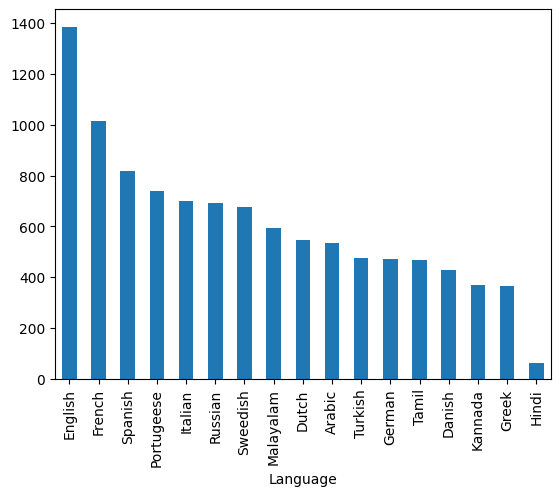

In [16]:
df.Language.value_counts().plot.bar()

Muy pocos datos de algunos idiomas. Hagamos sobremuestreo.

In [17]:
cv = CountVectorizer(input='content')
text_data = cv.fit_transform(df.Text).toarray()
le = LabelEncoder()
y_data = le.fit_transform(df.Language)

In [18]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [19]:
text_data.shape

(10337, 39928)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(text_data, y_data, test_size=0.2)

In [21]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(8269, 39928))

In [22]:
rmc = RandomForestClassifier()
rmc.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [23]:
rmc.score(X=X_test, y=y_test)

0.9327852998065764

In [24]:
confusion_matrix(y_pred=rmc.predict(X_test), y_true=y_test, labels=le.transform(le.classes_))

array([[104,   0,   0,   0,   0,   0,   0,   0,   0,  12,   0,   0,   0,
          0,   0,   0,   0],
       [  0,  73,   0,   2,   1,   1,   0,   0,   0,   3,   0,   0,   0,
          0,   5,   0,   0],
       [  0,   0, 106,   4,   0,   0,   0,   0,   0,   3,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   1,   0, 286,   0,   0,   0,   0,   0,   6,   0,   0,   0,
          0,   0,   0,   1],
       [  0,   0,   0,   0, 222,   0,   0,   0,   1,   3,   0,   0,   0,
          2,   0,   0,   0],
       [  0,   0,   1,   0,   0, 103,   0,   0,   0,   4,   0,   0,   0,
          0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  69,   0,   0,   6,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5,   0,   2,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 109,   8,   0,   1,   0,
          2,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  81,   0,   0,   0,
         

In [25]:
pd.DataFrame(
    columns=le.classes_,
    index=le.classes_,
    data=confusion_matrix(y_pred=rmc.predict(X_test), y_true=y_test, labels=le.transform(le.classes_))
).style.background_gradient(cmap='Blues')

,Arabic,Danish,Dutch,English,French,German,Greek,Hindi,Italian,Kannada,Malayalam,Portugeese,Russian,Spanish,Sweedish,Tamil,Turkish
Arabic,104,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0
Danish,0,73,0,2,1,1,0,0,0,3,0,0,0,0,5,0,0
Dutch,0,0,106,4,0,0,0,0,0,3,0,0,0,0,0,0,0
English,0,1,0,286,0,0,0,0,0,6,0,0,0,0,0,0,1
French,0,0,0,0,222,0,0,0,1,3,0,0,0,2,0,0,0
German,0,0,1,0,0,103,0,0,0,4,0,0,0,0,1,0,0
Greek,0,0,0,0,0,0,69,0,0,6,0,0,0,0,0,0,0
Hindi,0,0,0,0,0,0,0,5,0,2,0,0,0,0,0,0,0
Italian,0,0,0,0,0,0,0,0,109,8,0,1,0,2,0,0,0
Kannada,0,0,0,0,0,0,0,0,0,81,0,0,0,0,0,0,0


In [26]:
with open('modelo.pkl', 'wb') as file:
    pickle.dump(rmc, file=file)